<a href="https://colab.research.google.com/github/DivyaPrasanna56/sunny/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd

# Try reading the file using a different delimiter, like a tab or space.
df = pd.read_csv('/content/How to set up an educational YouTube channel #youtubechannel #youtubetips (3).txt', delimiter='\t')  # Try with a tab delimiter
# If a tab doesn't work, try a space:
# df = pd.read_csv('/content/How to set up an educational YouTube channel #youtubechannel #youtubetips (3).txt', delimiter=' ')

# Alternatively, you can use the error_bad_lines argument to skip problematic rows:
# df = pd.read_csv('/content/How to set up an educational YouTube channel #youtubechannel #youtubetips (3).txt', error_bad_lines=False) # Skip bad lines

# or on_bad_lines='skip'
#df = pd.read_csv('/content/How to set up an educational YouTube channel #youtubechannel #youtubetips (3).txt', on_bad_lines='skip') # Skip bad lines


df.head()

,How do I run my YouTube channel and how do I make money from it? In this video I'm going to quickly take you through all the steps.
0,So if you are thinking of setting up a YouTube...
1,It's not particularly complicated and I'll als...
2,So what I'm going to cover in this quick video...
3,It's not particularly complicated.
4,There's one really important thing to think ab...


In [ ]:
print("Shape of the DataFrame:",df.shape)
print(df.sample(5))


Shape of the DataFrame: (110, 1)
   How do I run my YouTube channel and how do I make money from it? In this video I'm going to quickly take you through all the steps.
25  That's a really important aspect of it and obv...                                                                                 
21                              I then plan my video.                                                                                 
20  I then study it and I've often done some actua...                                                                                 
79  But that really doesn't matter as I've said ri...                                                                                 
55                           You need to think niche.                                                                                 


Total number of sentiments of text data
How do I run my YouTube channel and how do I make money from it? In this video I'm going to quickly take you through all the steps.
So if you are thinking of setting up a YouTube channel, you'll understand all the things you need to think about.                                                                                  1
I often work with companies that are developing software.                                                                                                                                          1
Listen, if you want language lessons with me, click on the link below.                                                                                                                             1
But that really doesn't matter as I've said right from the start even before you monetize your channel, make sure that in your videos you're pointing out, let's say you're a language teacher.    1
You have to get to a certain number of s

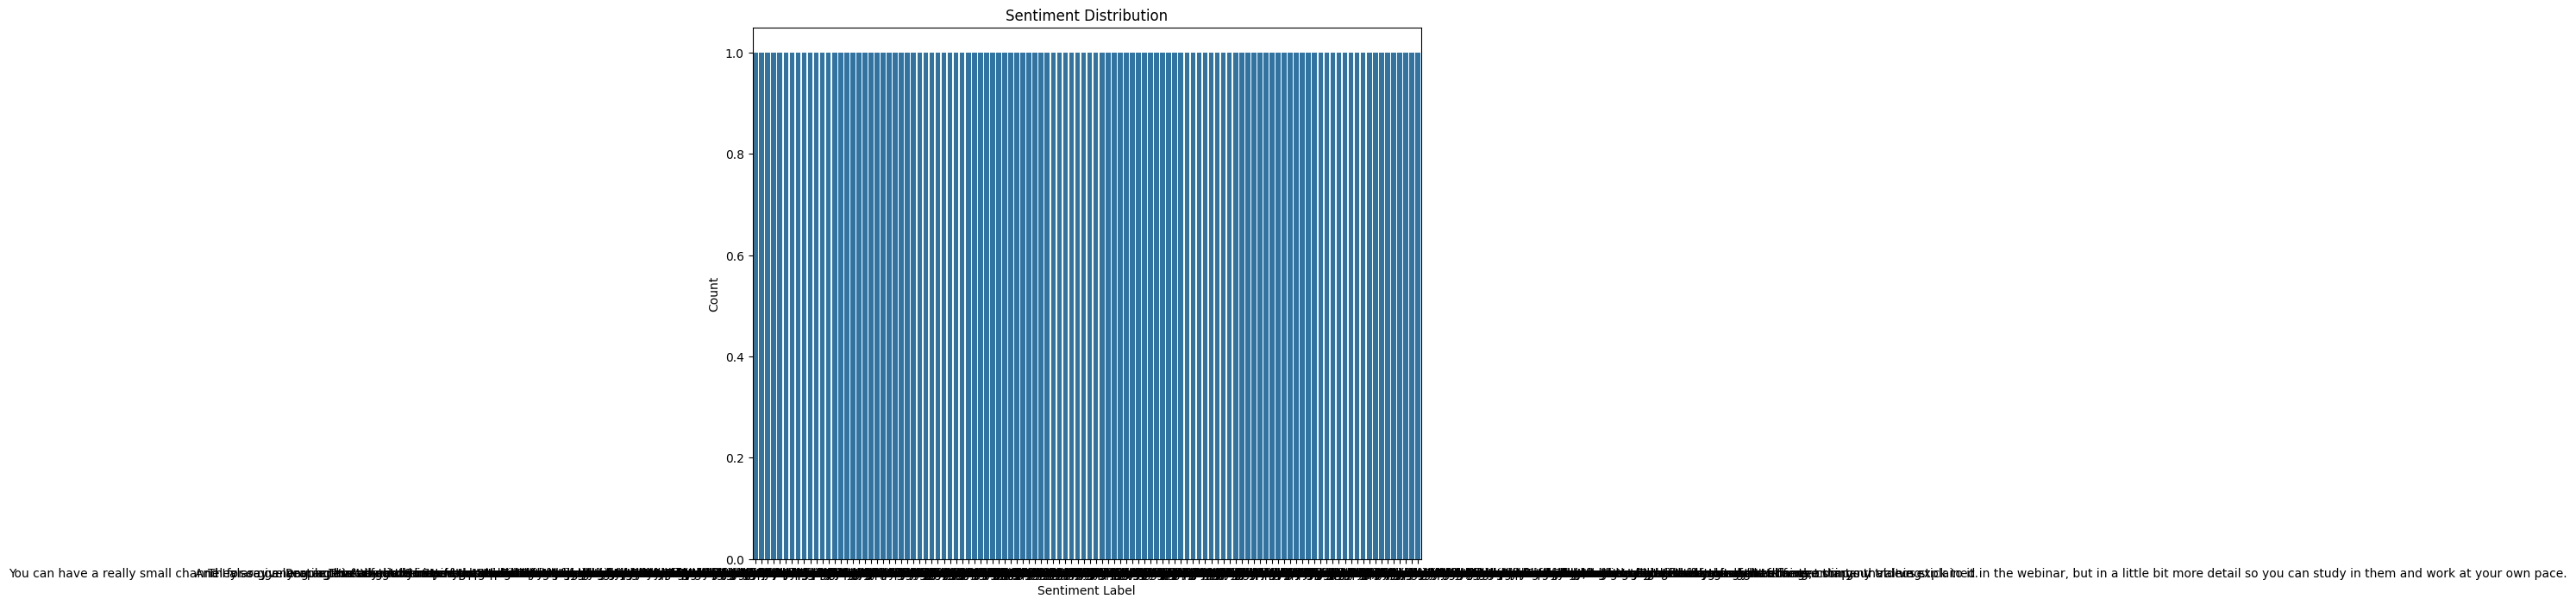

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import cprint

cprint("Total number of sentiments of text data")

# Assuming your sentiment column is named something else (e.g., 'sentiment'), replace 'sentiment' with the actual column name.
# Get the actual column name from the DataFrame
column_name = df.columns[0]  # Assuming it's the first column
print(df[column_name].value_counts())

sentiment_counts = df[column_name].value_counts() # Replace with actual column name

plt.figure(figsize=(10, 8))
# Use the correct column name for the countplot
ax = sns.countplot(x=column_name, data=df)
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment Label")
ax.set_ylabel("Count")
plt.show()

In [ ]:
import string
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Get the actual column name from the DataFrame's columns
column_name = df.columns[0]  # Assuming it's the first column

# Use the correct column name to access the data
df['labels'] = encoder.fit_transform(df[column_name])
df.head()

,How do I run my YouTube channel and how do I make money from it? In this video I'm going to quickly take you through all the steps.,labels
0,So if you are thinking of setting up a YouTube...,68
1,It's not particularly complicated and I'll als...,48
2,So what I'm going to cover in this quick video...,74
3,It's not particularly complicated.,49
4,There's one really important thing to think ab...,92


In [ ]:
from textblob import TextBlob

# Load your text file
file_path = '/content/How to set up an educational YouTube channel #youtubechannel #youtubetips (3).txt'
with open(file_path, 'r') as file:
    sentences = file.readlines()

# Analyze each sentence
for sentence in sentences:
    analysis = TextBlob(sentence)
    # Assuming positive, neutral, or negative as basic emotions
    if analysis.sentiment.polarity > 0:
        emotion = "Positive"
    elif analysis.sentiment.polarity < 0:
        emotion = "Negative"
    else:
        emotion = "Neutral"

    print(f"Sentence: {sentence.strip()}")
    print(f"Emotion: {emotion}\n")


Sentence: How do I run my YouTube channel and how do I make money from it? In this video I'm going to quickly take you through all the steps.
Emotion: Positive

Sentence: 
Emotion: Neutral

Sentence: So if you are thinking of setting up a YouTube channel, you'll understand all the things you need to think about.
Emotion: Neutral

Sentence: 
Emotion: Neutral

Sentence: It's not particularly complicated and I'll also tell you about the course that I run.
Emotion: Positive

Sentence: 
Emotion: Neutral

Sentence: So what I'm going to cover in this quick video is first of all the steps I take and it's not that many.
Emotion: Positive

Sentence: 
Emotion: Neutral

Sentence: It's not particularly complicated.
Emotion: Positive

Sentence: 
Emotion: Neutral

Sentence: There's one really important thing to think about.
Emotion: Positive

Sentence: 
Emotion: Neutral

Sentence: I'm going to show you the equipment that I use.
Emotion: Neutral

Sentence: 
Emotion: Neutral

Sentence: It's very cheap 